<a href="https://colab.research.google.com/github/Parkshinhyang/Algorithm/blob/main/BFS%EC%99%80_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BFS & DFS 란?

DFS와 BFS는 대표적인 그래프 탐색 알고리즘이다. 그래프 탐색 알고리즘이란, 어떤 한 그래프와 해당 그래프의 시작 정점이 주어졌을 때, 시작점에서 간선(Edge, E)을 타고 이동할 수 있는 정점(Vertex, V)들을 모두 찾아야 하는 문제를 의미한다. 

## BFS(Breadth First Search, 너비 우선 탐색)

일단 BFS는 너비 우선 탐색이라 불리며 말 그대로 너비를 우선해서 탐색하는 기법이다.
시작점인 루트 노트와 같은 거리에 있는 노드를 우선적으로 탐색한다고 생각하면 된다.

BFS는 큐(queue) 자료구조를 사용하여 구현하는 것이 일반적이다. 기본적인 구현 방법은 루트 노드에 연결된 자식 노드를 찾고 찾은 노드를 큐에 저장한 후 큐의 가장 앞쪽 노드를 뽑아서 반복한다. 

이때 큐를 list를 생성해 입력할 때는 list.append(), 출력할 때는 list.pop(0)으로 구현하시는 분이 계신다. 하지만 list.pop(0)은 O(N)란 시간복잡도를 가져 비교적 비효율적인 코드가 만들어지게 된다. [(시간복잡도 참고)](https://wiki.python.org/moin/TimeComplexity)

collections 라이브러리의 deque 를 사용하면 시간을 절약할 수 있다.

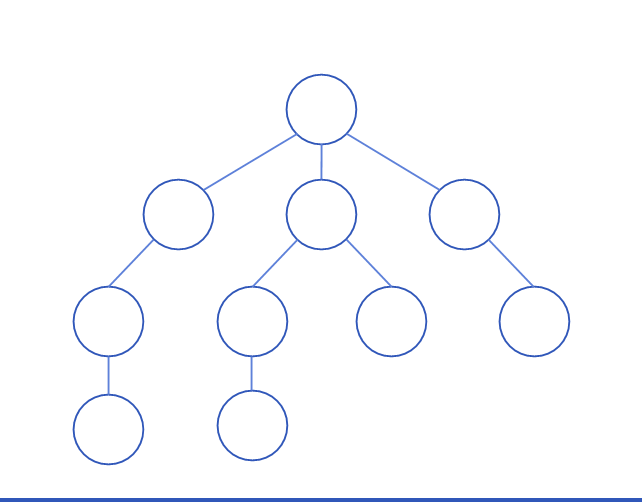



In [3]:
graph_list = {1: set([3, 4]),
              2: set([3, 4, 5]),
              3: set([1, 5]),
              4: set([1]),
              5: set([2, 6]),
              6: set([3, 5])}
root_node = 1

from collections import deque

def BFS(graph, root):
    visited = []
    queue = deque([root])

    while queue:
        n = queue.popleft()
        if n not in visited:
            visited.append(n)
            queue += graph[n] - set(visited)
    return visited
  
print(BFS(graph_list, root_node))

[1, 3, 4, 5, 2, 6]


## DFS(Depth First Search, 깊이 우선 탐색)

DFS는 깊이 우선 탐색이라 불리며 말 그대로 깊이를 우선해서 탐색하는 기법이다. 시작점인 루트 노트에서 갈 수 있는 최대한의 리프 노드까지 탐색을 한 후 이전 갈림길에서 선택하지 않았던 노드를 방문하는 식으로 탐색한다.

DFS는 먼저 방문한 노드에 연결된 노드보다 현재 방문한 노드에 연결된 노드를 방문해야 한 방향으로 갈 수 있기 때문에 스택(Stack)을 사용하는 것이 일반적이다.

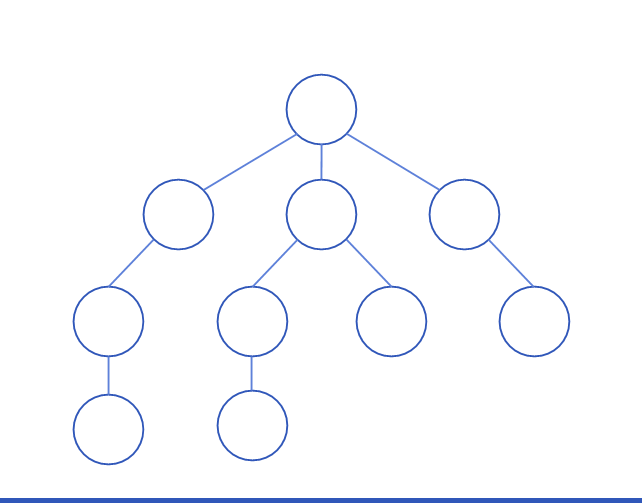

In [5]:
def DFS(graph, root):
    visited = []
    stack = [root]

    while stack:
        n = stack.pop()
        if n not in visited:
            visited.append(n)
            stack += graph[n] - set(visited)
    return visited

print(DFS(graph_list, root_node))

[1, 4, 3, 5, 6, 2]


## BFS의 장점

- 모든 경로를 탐색하기에 여러 해가 있을 경우에도 최단 경로임을 보장함.
- 최단 경로가 존재하면 깊이가 무한정 깊어진다고 해도 답을 찾을 수 있음.
- 여러 경로 중 무한한 길이를 가지는 경로가 존재하더라도, 모든 경로를 동시에 탐색을 진행하기 때문에 탐색 가능.
- 노드의 수가 적고, 깊이가 얕은 해가 존재할 때 유리함.
- 탐색하는 트리 또는 그래프의 크기에 비례하는 시간 복잡도를 가짐.

## BFS의 단점

- 노드의 수가 많을수록 탐색 가지가 급격히 증가함에 따라 보다 많은 기억 공간(메모리)을 필요로 하게 됨.
- 메모리 상의 확장된 노드들을 저장할 필요가 있기에 탐색하는 트리 또는 그래프의 크기에 비례하는 공간 복잡도를 가짐.

## DFS의 장점

- 현 경로상의 노드들만 기억하기 때문에 적은 메모리를 사용. (공간 복잡도)
- 목표 노드가 깊은 단계에 있는 경우 BFS 보다 빠르게 탐색 가능.

## DFS의 단점

- 해가 없는 경로를 탐색할 경우 단계가 끝날 때까지 (현 경로의 가장 끝까지) 탐색함. 
- 답이 아닌 경로가 매우 깊다면, 그 경로에 깊이 빠지게 됨. 
- 여러 경로 중 무한한 길이를 가지는 경로가 존재하고 해가 다른 경로에 존재하는 경우, 무한한 길이의 경로에서 빠져나오지 못해 영원히 종료하지 못함
- 효율성을 높이기 위해서 미리 지정한 임의 깊이까지만 탐색하고 (재귀로 구현한다면 재귀 호출 횟수를 제한하는 등), 해를 발견하지 못하면 빠져나와 다른 경로를 탐색하는 방법을 사용해야 함.
- 목표에 이르는 경로가 다수인 경우, DFS는 해에 도착하면 탐색을 종료하기에 얻어진 해가 최단 경로라는 보장이 없음.

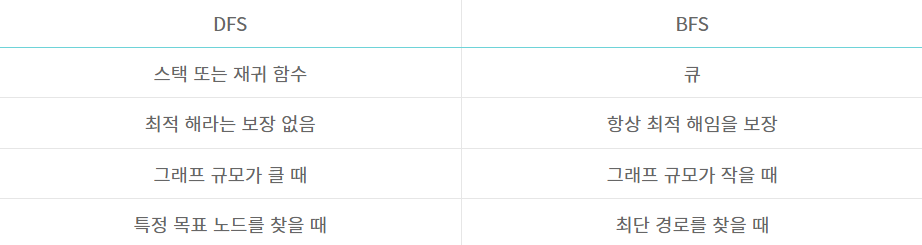

<center>
표 출처 : https://veggie-garden.tistory.com/42
<center>